In [28]:
import pandas as pd
df = pd.read_csv("logs.csv.gz", compression="gzip")

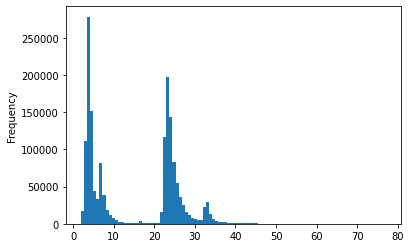

In [57]:
ax = df[df['rt'] > 2]['rt'].plot.hist(bins=100)

In [119]:
def bucket(r):
    r = r.rsplit('HTTP/')[0].split('GET ')[-1]
    for s in ('?', '/dataset/', '/reference/', '/inventory/', '/comment/', '/node/', '/suggested-datasets/', '/4plan/', '/apps/'):
        if s in r:
            r = r.split(s)[0] + s + '…'
    return r
bdf = df[['request','rt']].copy(deep=True)
bdf['request'] = bdf['request'].map(bucket)

In [120]:
import numpy as np
sdf = bdf.groupby(['request']).agg(['median','count'])
sdf.columns = sdf.columns.map('_'.join)
sdf[sdf['rt_count'] > 10][sdf['rt_median'] > 4].sort_values('rt_median', ascending=False)

/home/ian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,rt_median,rt_count
request,,
/fr/search/travelq?…,23.6350,1029706
/fr/jeux-de-donnees-suggeres?…,9.0950,48
/fr/search/inventory,6.8650,27
/fr/apps,6.4320,193
/en/search/inventory,6.3420,114
/data/en/api/3/action/organization_list?…,6.2580,29
/fr/4plan/…,5.7450,83
/en/story/interactive-pipeline-map-visual-tool-open-data,5.7100,13
/en/search/inventory?…,5.6790,159
